In [12]:
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)
%run 'cross_validation/functions.ipynb'

In [13]:
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, None)
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)
hyperparameters = {'n_estimators': 120, 'max_depth': 10, 'max_features': 'sqrt', 'criterion': 'squared_error'}


In [14]:
predict_cruise(hyperparameters, 'pro')

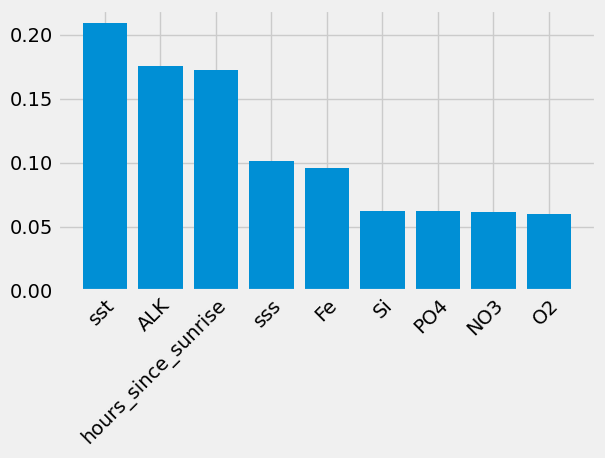

In [15]:
feature_importance('pro',feature_list_pro)

In [16]:
predictions, maes, rmses, mse_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pro')

In [17]:
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, None)
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)
hyperparameters = {'n_estimators': 120, 'max_depth': 10, 'max_features': 'sqrt', 'criterion': 'absolute_error'}

In [18]:
predict_cruise(hyperparameters, 'pro')

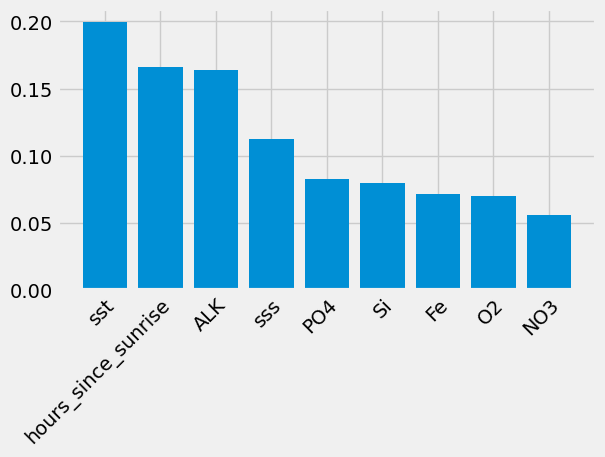

In [19]:
feature_importance('pro',feature_list_pro)

In [20]:
predictions, maes, rmses, mae_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pro')

In [21]:
pro_df, labels_pro, features_pro, feature_list_pro = preprocess_single_population(covari_pro, drop, None)
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)
hyperparameters = {'n_estimators': 120, 'max_depth': 10, 'max_features': 'sqrt', 'criterion': 'poisson'}

In [22]:
predict_cruise(hyperparameters, 'pro')

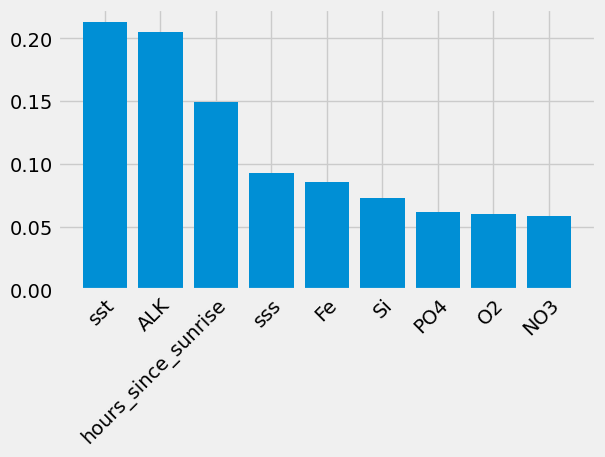

In [23]:
feature_importance('pro',feature_list_pro)

In [24]:
predictions, maes, rmses, poisson_rmse = predict_kfold(test_features, test_labels, train_labels, train_features, 'pro')

In [25]:
list_of_rmse = {'mse': mse_rmse,  
                'mae': mae_rmse,
                'poisson': poisson_rmse}
sorted_rmse = dict(sorted(list_of_rmse.items(), key=lambda item: item[1]))
print(sorted_rmse)
print('the percent improvement is:', (sorted_rmse['mse'] - sorted_rmse['poisson'])/sorted_rmse['mse'] * 100, '%' )

{'poisson': 2.8846494454606417, 'mse': 2.927390985963467, 'mae': 2.9529219400063553}
the percent improvement is: 1.460055752981624 %
